In [ ]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [ ]:
# read dataset from csv file

df1_raw = pd.read_csv("full_data.csv")
df2_raw = pd.read_csv("full_filled_stroke_data (1).csv")


In [ ]:
df1_raw.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [ ]:
df1_raw.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             201 non-null    object 
 1   age                201 non-null    float64
 2   hypertension       201 non-null    int64  
 3   heart_disease      201 non-null    int64  
 4   ever_married       201 non-null    object 
 5   work_type          201 non-null    object 
 6   Residence_type     201 non-null    object 
 7   avg_glucose_level  201 non-null    float64
 8   bmi                201 non-null    float64
 9   smoking_status     201 non-null    object 
 10  stroke             201 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 17.4+ KB


In [ ]:
df1_raw

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
def clean_df(df):
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    le = LabelEncoder()

    for col in cat_cols:
    # Encode values in training set
        le.fit(df[col])
        df[col] = le.transform(df[col])
    col_list = df.columns
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(data = x_scaled, columns = col_list)
    return df



In [ ]:
for i in df1_raw.columns:
    l = []
    for j in df1_raw[i]:
        if j not in l:
            l.append(j)
    print(i, l)

gender [1, 0]
age [67.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69.0, 78.0, 61.0, 54.0, 50.0, 64.0, 75.0, 60.0, 71.0, 52.0, 82.0, 65.0, 57.0, 42.0, 48.0, 72.0, 58.0, 76.0, 39.0, 77.0, 63.0, 73.0, 56.0, 45.0, 70.0, 59.0, 66.0, 43.0, 68.0, 47.0, 53.0, 38.0, 55.0, 46.0, 32.0, 51.0, 14.0, 3.0, 8.0, 37.0, 40.0, 35.0, 20.0, 44.0, 25.0, 27.0, 23.0, 17.0, 13.0, 4.0, 16.0, 22.0, 30.0, 29.0, 11.0, 21.0, 18.0, 33.0, 24.0, 36.0, 0.64, 34.0, 41.0, 0.88, 5.0, 26.0, 31.0, 7.0, 12.0, 62.0, 2.0, 9.0, 15.0, 28.0, 10.0, 1.8, 0.32, 1.08, 19.0, 6.0, 1.16, 1.0, 1.4, 1.72, 0.24, 1.64, 1.56, 0.72, 1.88, 1.24, 0.8, 0.4, 0.08, 1.48, 0.56, 1.32, 0.16, 0.48]
hypertension [0, 1]
heart_disease [1, 0]
ever_married [1, 0]
work_type [1, 2, 0, 3]
Residence_type [1, 0]
avg_glucose_level [228.69, 105.92, 171.23, 174.12, 186.21, 70.09, 94.39, 58.57, 80.43, 120.46, 104.51, 214.09, 167.41, 191.61, 221.29, 89.22, 193.94, 233.29, 228.7, 208.3, 102.87, 104.12, 100.98, 195.23, 212.08, 83.41, 196.92, 252.72, 84.2, 84.03, 219.72, 74.63, 9

In [ ]:
def clean_df_(df):
    labelencoder = LabelEncoder()
    cols = list(df.columns)
    remove_list = ['age', 'avg_glucose_level', 'bmi']
    for i in remove_list:
        cols.remove(i)
    print(cols)
    df[cols] = df[cols].apply(labelencoder.fit_transform)

    col_list = df.columns
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(data = x_scaled, columns = col_list)
    return df


In [ ]:
df1 = clean_df(df1_raw)
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.816895,0.0,1.0,1.0,0.333333,1.0,0.801265,0.647564,0.333333,1.0
1,1.0,0.975586,0.0,1.0,1.0,0.333333,0.0,0.234512,0.530086,0.666667,1.0
2,0.0,0.597168,0.0,0.0,1.0,0.333333,1.0,0.536008,0.584527,1.000000,1.0
3,0.0,0.963379,1.0,0.0,1.0,0.666667,0.0,0.549349,0.286533,0.666667,1.0
4,1.0,0.987793,0.0,0.0,1.0,0.333333,1.0,0.605161,0.429799,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,0.499512,0.0,0.0,0.0,0.333333,0.0,0.069384,0.452722,0.333333,0.0
4977,1.0,0.487305,0.0,0.0,1.0,0.333333,1.0,0.627966,0.489971,1.000000,0.0
4978,0.0,0.548340,1.0,0.0,1.0,0.000000,0.0,0.184194,0.510029,1.000000,0.0
4979,1.0,0.487305,0.0,0.0,1.0,0.333333,0.0,0.133044,0.458453,1.000000,0.0


In [ ]:
df1.stroke.value_counts()

0.0    4733
1.0     248
Name: stroke, dtype: int64

In [ ]:
df2 = clean_df(df2_raw)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,0.742395,0.0,0.0,1.0,0.666667,0.0,0.711602,0.789870,0.666667,1.0
1,0.0,0.717861,0.0,0.0,1.0,0.333333,0.0,0.091624,0.713946,0.000000,1.0
2,1.0,0.950932,0.0,1.0,1.0,0.333333,1.0,0.798308,0.740322,0.000000,1.0
3,1.0,0.693327,0.0,1.0,0.0,0.000000,1.0,0.784734,0.920171,0.000000,1.0
4,1.0,0.705594,0.0,0.0,1.0,0.333333,0.0,0.650765,0.779629,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
196,1.0,0.497056,0.0,0.0,0.0,0.333333,0.0,0.062116,0.685819,0.333333,0.0
197,1.0,0.484789,0.0,0.0,1.0,0.333333,1.0,0.657207,0.764916,1.000000,0.0
198,0.0,0.546124,1.0,0.0,1.0,0.000000,0.0,0.184429,0.803908,1.000000,0.0
199,1.0,0.484789,0.0,0.0,1.0,0.333333,0.0,0.129937,0.697079,1.000000,0.0


In [ ]:
df1.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


In [ ]:
df1_raw.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
X = np.array(df1.drop('stroke', axis = 1))
X

array([[1.        , 0.81689453, 0.        , ..., 0.80126489, 0.64756447,
        0.33333333],
       [1.        , 0.97558594, 0.        , ..., 0.23451205, 0.53008596,
        0.66666667],
       [0.        , 0.59716797, 0.        , ..., 0.53600776, 0.58452722,
        1.        ],
       ...,
       [0.        , 0.54833984, 1.        , ..., 0.18419352, 0.51002865,
        1.        ],
       [1.        , 0.48730469, 0.        , ..., 0.13304404, 0.45845272,
        1.        ],
       [0.        , 0.97558594, 1.        , ..., 0.13216693, 0.43266476,
        0.66666667]])

In [ ]:
Y = np.array(df1.stroke)
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)


In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
rate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate = rate)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer= adam, metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
117/117 [==============================] - 1s 1ms/step - loss: 0.2925 - accuracy: 0.9360 - precision: 0.0794 - recall: 0.0269
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/20
117/117 [==============================] - 0s 1ms/step - loss: 0.1640 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.00

In [ ]:
loss, accuracy, _, _ = model.evaluate(x_test, y_test, verbose = 0)
print('Accuracy : %.2f' % (accuracy*100))
print('Loss : %.2f' % (loss))


Accuracy : 95.10
Loss : 0.17


In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1184,    0],
       [  62,    0]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no stroke', 'stroke']
print("Test Data\n",classification_report(y_test, y_pred, target_names=target_names))


Test Data
               precision    recall  f1-score   support

   no stroke       0.95      1.00      0.97      1184
      stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1246
   macro avg       0.48      0.50      0.49      1246
weighted avg       0.90      0.95      0.93      1246



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = log_reg.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no stroke', 'stroke']
print("Train Data\n",classification_report(y_train, y_pred, target_names=target_names))


Train Data
               precision    recall  f1-score   support

   no stroke       0.95      1.00      0.97      3549
      stroke       1.00      0.01      0.01       186

    accuracy                           0.95      3735
   macro avg       0.98      0.50      0.49      3735
weighted avg       0.95      0.95      0.93      3735



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("Y_train : ",Y_train.shape)
print("Y_test : ",Y_test.shape)

X_train :  (3735, 10)
X_test :  (1246, 10)
Y_train :  (3735,)
Y_test :  (1246,)


In [ ]:
classifier = RandomForestClassifier(criterion = "gini", n_estimators = 5)
classifier.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
cm = metrics.confusion_matrix(Y_test,Y_pred)
cm

array([[1172,   12],
       [  59,    3]])

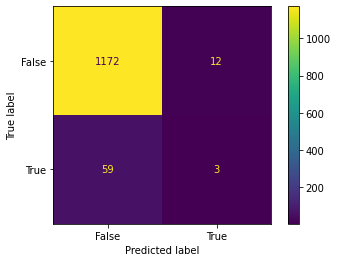

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1184
         1.0       0.20      0.05      0.08        62

    accuracy                           0.94      1246
   macro avg       0.58      0.52      0.52      1246
weighted avg       0.91      0.94      0.93      1246

